In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [11]:
df = pd.read_csv("C:/Users/91974/Desktop/Yokogawa/Model dataset/training/TRAIN-1(Copy).csv")  
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    900 non-null    object 
 1   Time                    900 non-null    object 
 2   Date & Time             900 non-null    object 
 3   -45 MINS PAST           900 non-null    object 
 4   Grade                   900 non-null    object 
 5   Section                 900 non-null    object 
 6   MFI gm/10 min           900 non-null    float64
 7   PL25_HDMFI_XI1400A      900 non-null    float64
 8   PL25_HDMFI_XI1401A      900 non-null    float64
 9   PL25_HDMFI_XI1403A      900 non-null    float64
 10  PL25_HDMFI_XI1430       900 non-null    float64
 11  PL25_HDMFI_TIC1090A     900 non-null    float64
 12  PL25_HDMFI_PI1111A      900 non-null    float64
 13  PL25_HDMFI_KPI_DP_ADS   900 non-null    float64
 14  PL25_HDMFI_TI1112       900 non-null    fl

In [12]:
print(df.columns)

Index(['Date', 'Time ', 'Date & Time', '-45 MINS PAST', 'Grade', 'Section ',
       'MFI gm/10 min', 'PL25_HDMFI_XI1400A', 'PL25_HDMFI_XI1401A',
       'PL25_HDMFI_XI1403A', 'PL25_HDMFI_XI1430', 'PL25_HDMFI_TIC1090A',
       'PL25_HDMFI_PI1111A', 'PL25_HDMFI_KPI_DP_ADS', 'PL25_HDMFI_TI1112',
       'PL25_HDMFI_XI1440B', 'PL25_HDMFI_XI1440F', 'PL25_HDMFI_TDI1129',
       'PL25_HDMFI_TDI1108C', 'PL25_HDMFI_XI1428', 'PL25_HDMFI_XI1405A',
       'PL25_HDMFI_XI1406A', 'PL25_HDMFI_KPI_FB1_FLW'],
      dtype='object')


In [13]:
columns_to_drop = ['Date','Time ','Date & Time','-45 MINS PAST','Section ','Grade','MFI gm/10 min']
X = df.drop(columns_to_drop, axis=1)  # Features
y = df['MFI gm/10 min']  # Target variable


In [14]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)


In [15]:
# Define models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=200)
]

In [16]:
# Dataframe to store actual and predicted values
comparison_df = pd.DataFrame()


Model: LinearRegression
MAE (Training): 0.10640435214207102
R-squared (Training): 0.1929968952758485
MAE (Testing): 0.0919684932703897
R-squared (Testing): -9.432860656928094
     Actual LinearRegression  Predicted LinearRegression
258                     0.36                    0.273161
557                     0.28                    0.573779
651                     0.33                    0.341453
241                     0.32                    0.340759
87                      0.33                    0.210829


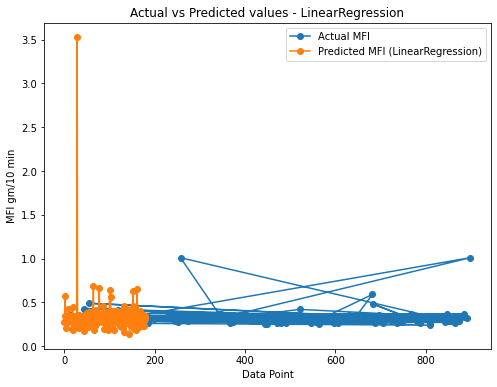


Model: DecisionTreeRegressor
MAE (Training): 9.251858538542971e-19
R-squared (Training): 1.0
MAE (Testing): 0.042611111111111113
R-squared (Testing): -0.4845120491612924
     Actual LinearRegression  Predicted LinearRegression  \
258                     0.36                    0.273161   
557                     0.28                    0.573779   
651                     0.33                    0.341453   
241                     0.32                    0.340759   
87                      0.33                    0.210829   

     Actual DecisionTreeRegressor  Predicted DecisionTreeRegressor  
258                          0.36                             0.36  
557                          0.28                             0.32  
651                          0.33                             0.33  
241                          0.32                             0.34  
87                           0.33                             0.28  


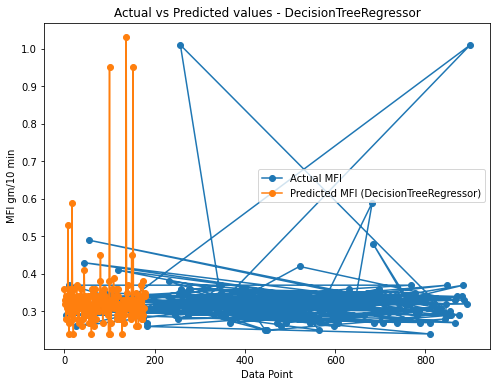


Model: RandomForestRegressor
MAE (Training): 0.030450069444444415
R-squared (Training): 0.7849615034060636
MAE (Testing): 0.04773027777777777
R-squared (Testing): -6.156960591695091
     Actual LinearRegression  Predicted LinearRegression  \
258                     0.36                    0.273161   
557                     0.28                    0.573779   
651                     0.33                    0.341453   
241                     0.32                    0.340759   
87                      0.33                    0.210829   

     Actual DecisionTreeRegressor  Predicted DecisionTreeRegressor  \
258                          0.36                             0.36   
557                          0.28                             0.32   
651                          0.33                             0.33   
241                          0.32                             0.34   
87                           0.33                             0.28   

     Actual RandomForestRegressor  

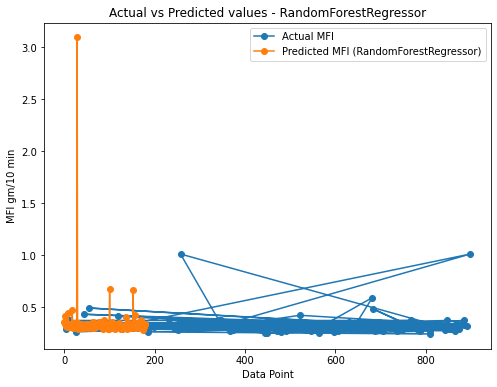

In [17]:
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions for training set
    y_train_pred = model.predict(X_train)

    # Make predictions for testing set
    y_test_pred = model.predict(X_test)

    # Evaluate the model on training set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Evaluate the model on testing set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Print model performance
    print(f"\nModel: {type(model).__name__}")
    print(f"MAE (Training): {mae_train}")
    print(f"R-squared (Training): {r2_train}")
    print(f"MAE (Testing): {mae_test}")
    print(f"R-squared (Testing): {r2_test}")

    # Add actual and predicted values to the comparison dataframe
    comparison_df[f'Actual {type(model).__name__}'] = y_test
    comparison_df[f'Predicted {type(model).__name__}'] = y_test_pred

    # Displaying the DataFrame
    print(comparison_df.head())

    # Plotting the comparison graph as a line plot
    plt.figure(figsize=(8, 6))
    plt.plot(y_test, label='Actual MFI', marker='o')
    plt.plot(y_test_pred, label=f'Predicted MFI ({type(model).__name__})', marker='o')
    plt.title(f"Actual vs Predicted values - {type(model).__name__}")
    plt.xlabel("Data Point")
    plt.ylabel("MFI gm/10 min")
    plt.legend()
    plt.show()

In [9]:
# Save the comparison dataframe to an Excel sheet
comparison_df.to_excel("C:/Users/91974/Desktop/Yokogawa/Model dataset/comparison_train1.xlsx", index=False)

In [73]:

#comparison_df = pd.DataFrame({'Actual MFI': y_test, 'Predicted MFI': y_test_pred})
#print("\nActual vs Predicted MFI for Testing Set:")
#print(comparison_df.head())